In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
def calzetti(A_lambda, lbda, R_V):
    x = 1/lbda
    if 0.63 <= lbda <= 2.20: #micro meters
        coeff = ((2.659*(-1.857 + 1.040*x))/R_V) + 1
    elif 0.12 < lbda < 0.63:
        coeff = (2.659*(-2.156 + (1.509/lbda) - (0.198/lbda**2) + (0.011/lbda**3))/R_V) + 1
    return coeff

In [67]:
h_alpha = 0.656281 #micro m

In [106]:
masses = np.linspace(1e8, 1e12)
A_Vs = []
A_lambdas = []

for m_stellar in masses:
    x = np.log10(m_stellar/1e10)

    A_lambda = 0.91 + 0.77*x + 0.11*(x**2) - 0.09*(x**3)
    A_lambdas.append(A_lambda)
    
    ratio = calzetti(A_lambda, h_alpha, R_V=4.2) #A lambda/ AV
    A_Vs.append(A_lambda/ratio)

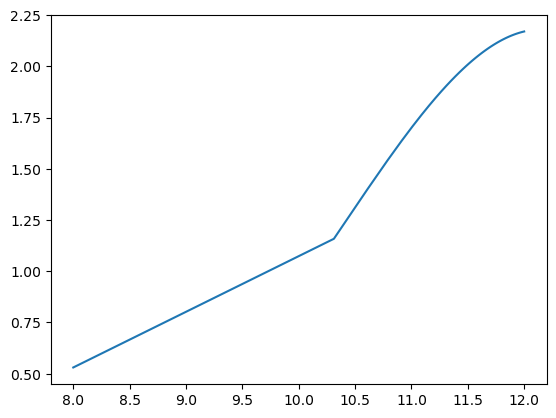

In [107]:
plt.plot(np.log10(masses), A_lambdas)

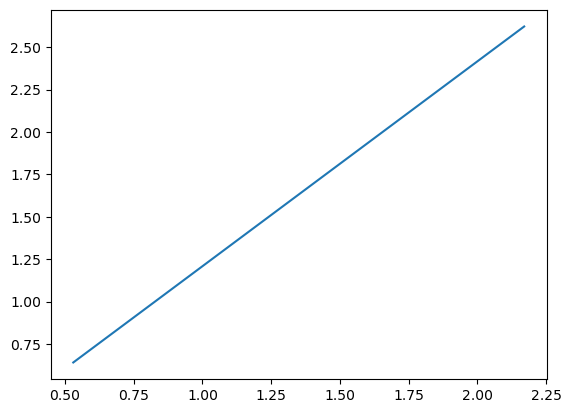

In [108]:
plt.plot(A_lambdas, A_Vs)

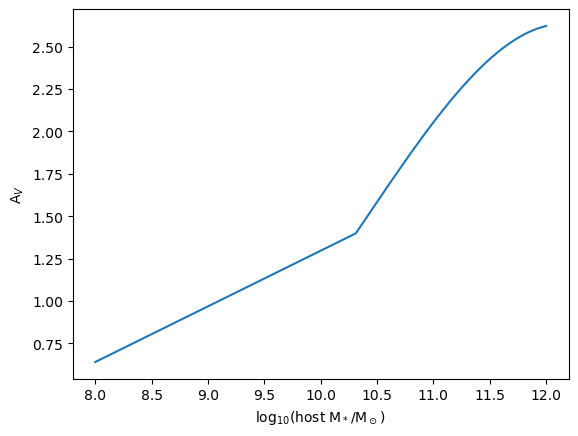

In [110]:
plt.plot(np.log10(masses), A_Vs)
plt.xlabel('log$_{10}$(host M$_*$/M$_\\odot$)')
plt.ylabel("A$_V$")
plt.savefig('../figures/extinction.pdf', dpi = 300, bbox_inches='tight')
plt.show()

In [ ]:
import sncosmo

class CalzettiDust(sncosmo.PropagationEffect):
    """Celzetti (2000) extinction model dust."""
    _param_names = ['ebv', 'r_v']
    param_names_latex = ['E(B-V)', 'R_V']
    _minwave = 1000.
    _maxwave = 33333.33

    def __init__(self):
        self._parameters = np.array([0., 3.1])

    def propagate(self, wave, flux):
        """Propagate the flux."""
        ebv, r_v = self._parameters
        return extinction.apply(extinction.ccm89(wave, ebv * r_v, r_v), flux)


In [ ]:
tde_source = tde_utils.BlackBodySource(30000)
tde_model = sncosmo.Model(source=tde_source)

In [103]:
def cardelli(A_lambda, lbda, R_V):
    x = 1/lbda #micrometer
    if 0.3 <= x <= 1.1:
        a = 0.574* (x**1.61)
        b = -0.527*(x**1.61)
    elif 1.1 <= x <= 3.3:
        y = x - 1.82
        a = 1 + 0.17699*y - 0.50447*(y**2) - 0.02427*(y**3) + 0.72085*(y**4) + 0.01979*(y**5) - 0.77530*(y**6) + 0.3299*(y**7)
        b = 1.41338*y + 2.28305*(y**2) + 1.07233*(y**3) - 5.38434*(y**4) - 0.62251*(y**5) + 5.30260*(y**6) - 2.09002*(y**7)
        
    coeff = a + (b/R_V)
    return coeff

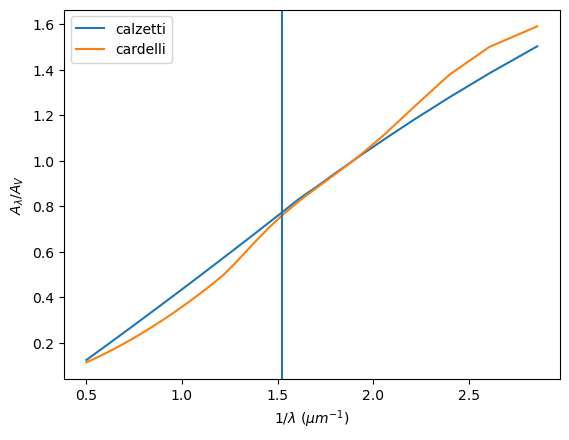

In [105]:
cardelli_ratio = []
calzetti_ratio = []
for lbda in np.linspace(0.35, 2.2):
    A_lbda = 1
    ratio = calzetti(A_lbda, lbda, 4.2)
    calzetti_ratio.append(ratio)
    
    ratio = cardelli(A_lbda, lbda, 3.1)
    cardelli_ratio.append(ratio)
    
plt.plot(1/np.linspace(0.35, 2.0), calzetti_ratio, label = 'calzetti')
plt.plot(1/np.linspace(0.35, 2.0), cardelli_ratio, label = 'cardelli')
plt.xlabel('1/$\\lambda$ ($\\mu m^{-1}$)')
plt.ylabel('$A_\\lambda/A_V$')
plt.legend()
plt.axvline(1/h_alpha)
plt.show()